In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score
sns.set_style("white")

In [ ]:

from google.colab import files
  
  
uploaded = files.upload()


Saving winequality-white.csv to winequality-white.csv


In [ ]:
white_wine = pd.read_csv("/content/winequality-white.csv", delimiter=";")
white_wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

In [ ]:
white_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white_wine.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

In [ ]:
white_wine.corr()

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.022697  ... -0.120881 -0.113663
volatile acidity          -0.022697          1.000000  ...  0.067718 -0.194723
citric acid                0.289181         -0.149472  ... -0.075729 -0.009209
residual sugar             0.089021          0.064286  ... -0.450631 -0.097577
chlorides                  0.023086          0.070512  ... -0.360189 -0.209934
free sulfur dioxide       -0.049396         -0.097012  ... -0.250104  0.008158
total sulfur dioxide       0.091070          0.089261  ... -0.448892 -0.174737
density                    0.265331          0.027114  ... -0.780138 -0.307123
pH                        -0.425858         -0.031915  ...  0.121432  0.099427
sulphates                 -0.017143         -0.035728  ... -0.017433  0.053678
alcohol                   -0.120881          0.067718  ...  1.000000  0.435575
quality                   -0.113663         -0.194723  ...  0.435575  1.000000

[12 rows x 12 columns]

In [ ]:
white_wine.corr().where(np.tril(np.ones(white_wine.corr().shape)).astype('bool'))

fixed acidity  volatile acidity  ...   alcohol  quality
fixed acidity              1.000000               NaN  ...       NaN      NaN
volatile acidity          -0.022697          1.000000  ...       NaN      NaN
citric acid                0.289181         -0.149472  ...       NaN      NaN
residual sugar             0.089021          0.064286  ...       NaN      NaN
chlorides                  0.023086          0.070512  ...       NaN      NaN
free sulfur dioxide       -0.049396         -0.097012  ...       NaN      NaN
total sulfur dioxide       0.091070          0.089261  ...       NaN      NaN
density                    0.265331          0.027114  ...       NaN      NaN
pH                        -0.425858         -0.031915  ...       NaN      NaN
sulphates                 -0.017143         -0.035728  ...       NaN      NaN
alcohol                   -0.120881          0.067718  ...  1.000000      NaN
quality                   -0.113663         -0.194723  ...  0.435575      1.0

[12 rows x 12 columns]

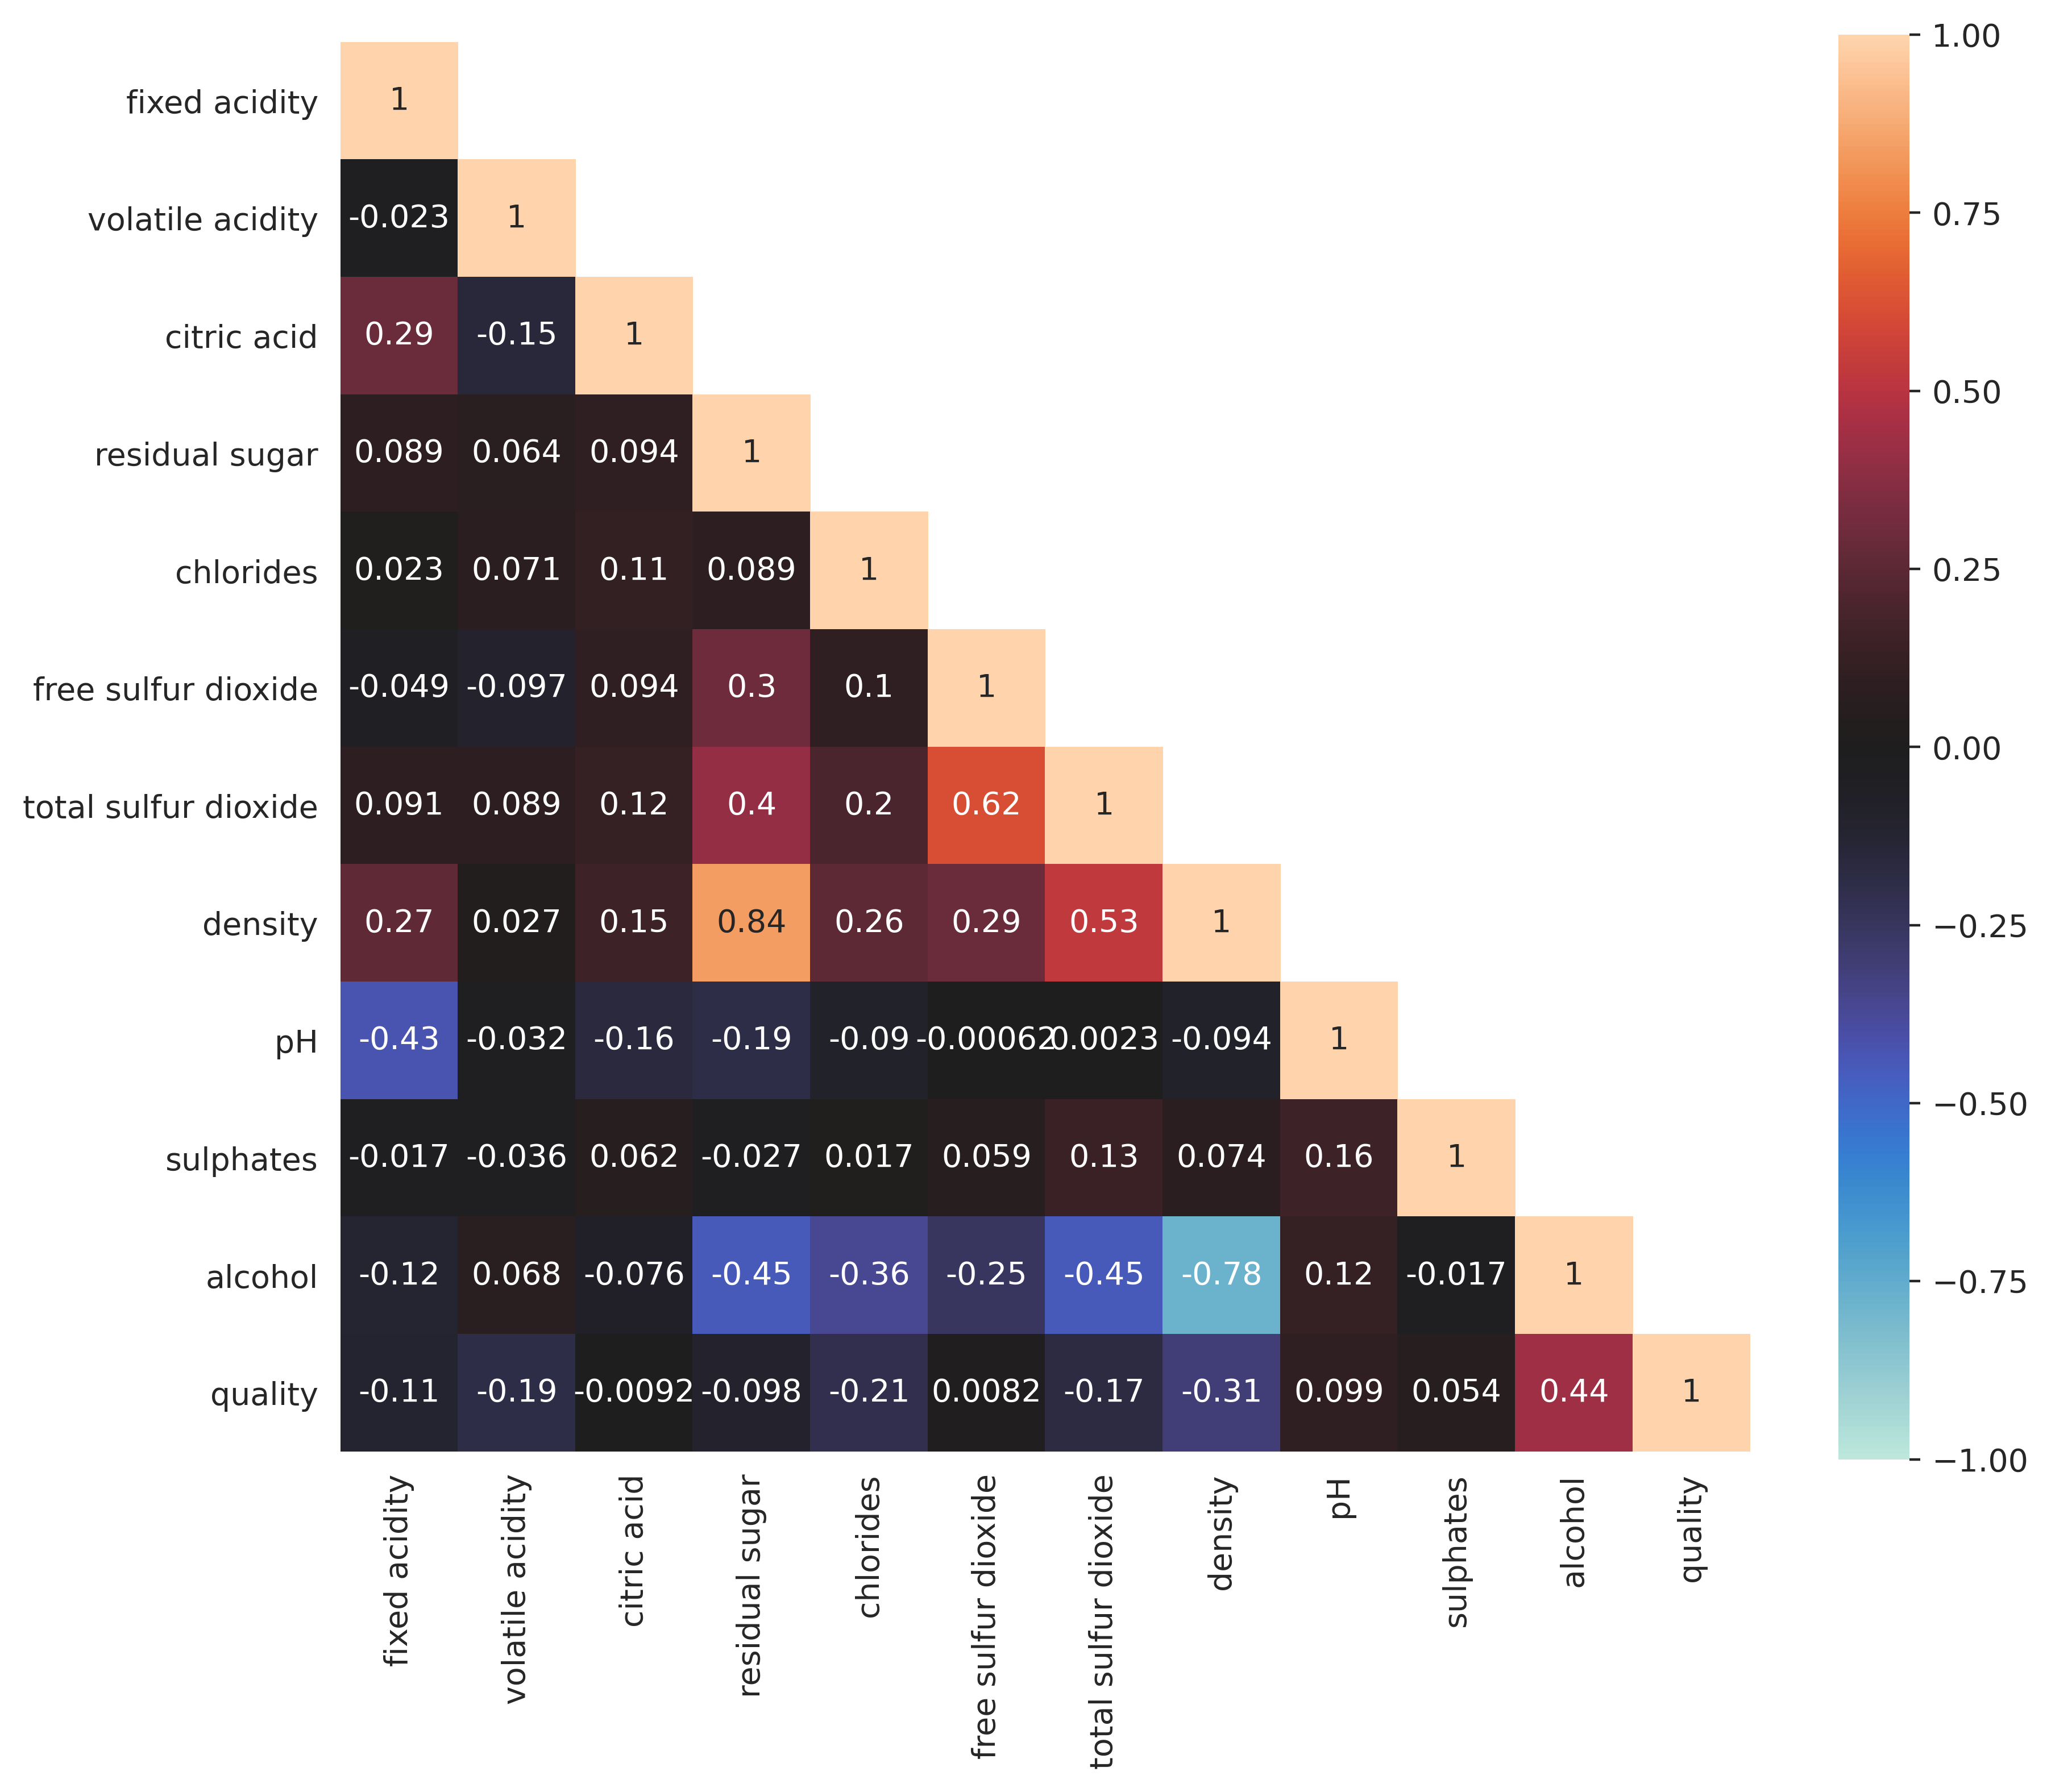

In [ ]:
fig= plt.figure(figsize=(10,10), dpi=400)
corr_df = white_wine.corr()
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype('bool'))
sns.heatmap(df_lt, annot=True, fmt='.2g', 
           vmin=-1,
           vmax=1,
           center=0,
           square=True,
           cbar_kws={'shrink': .83})
plt.show()

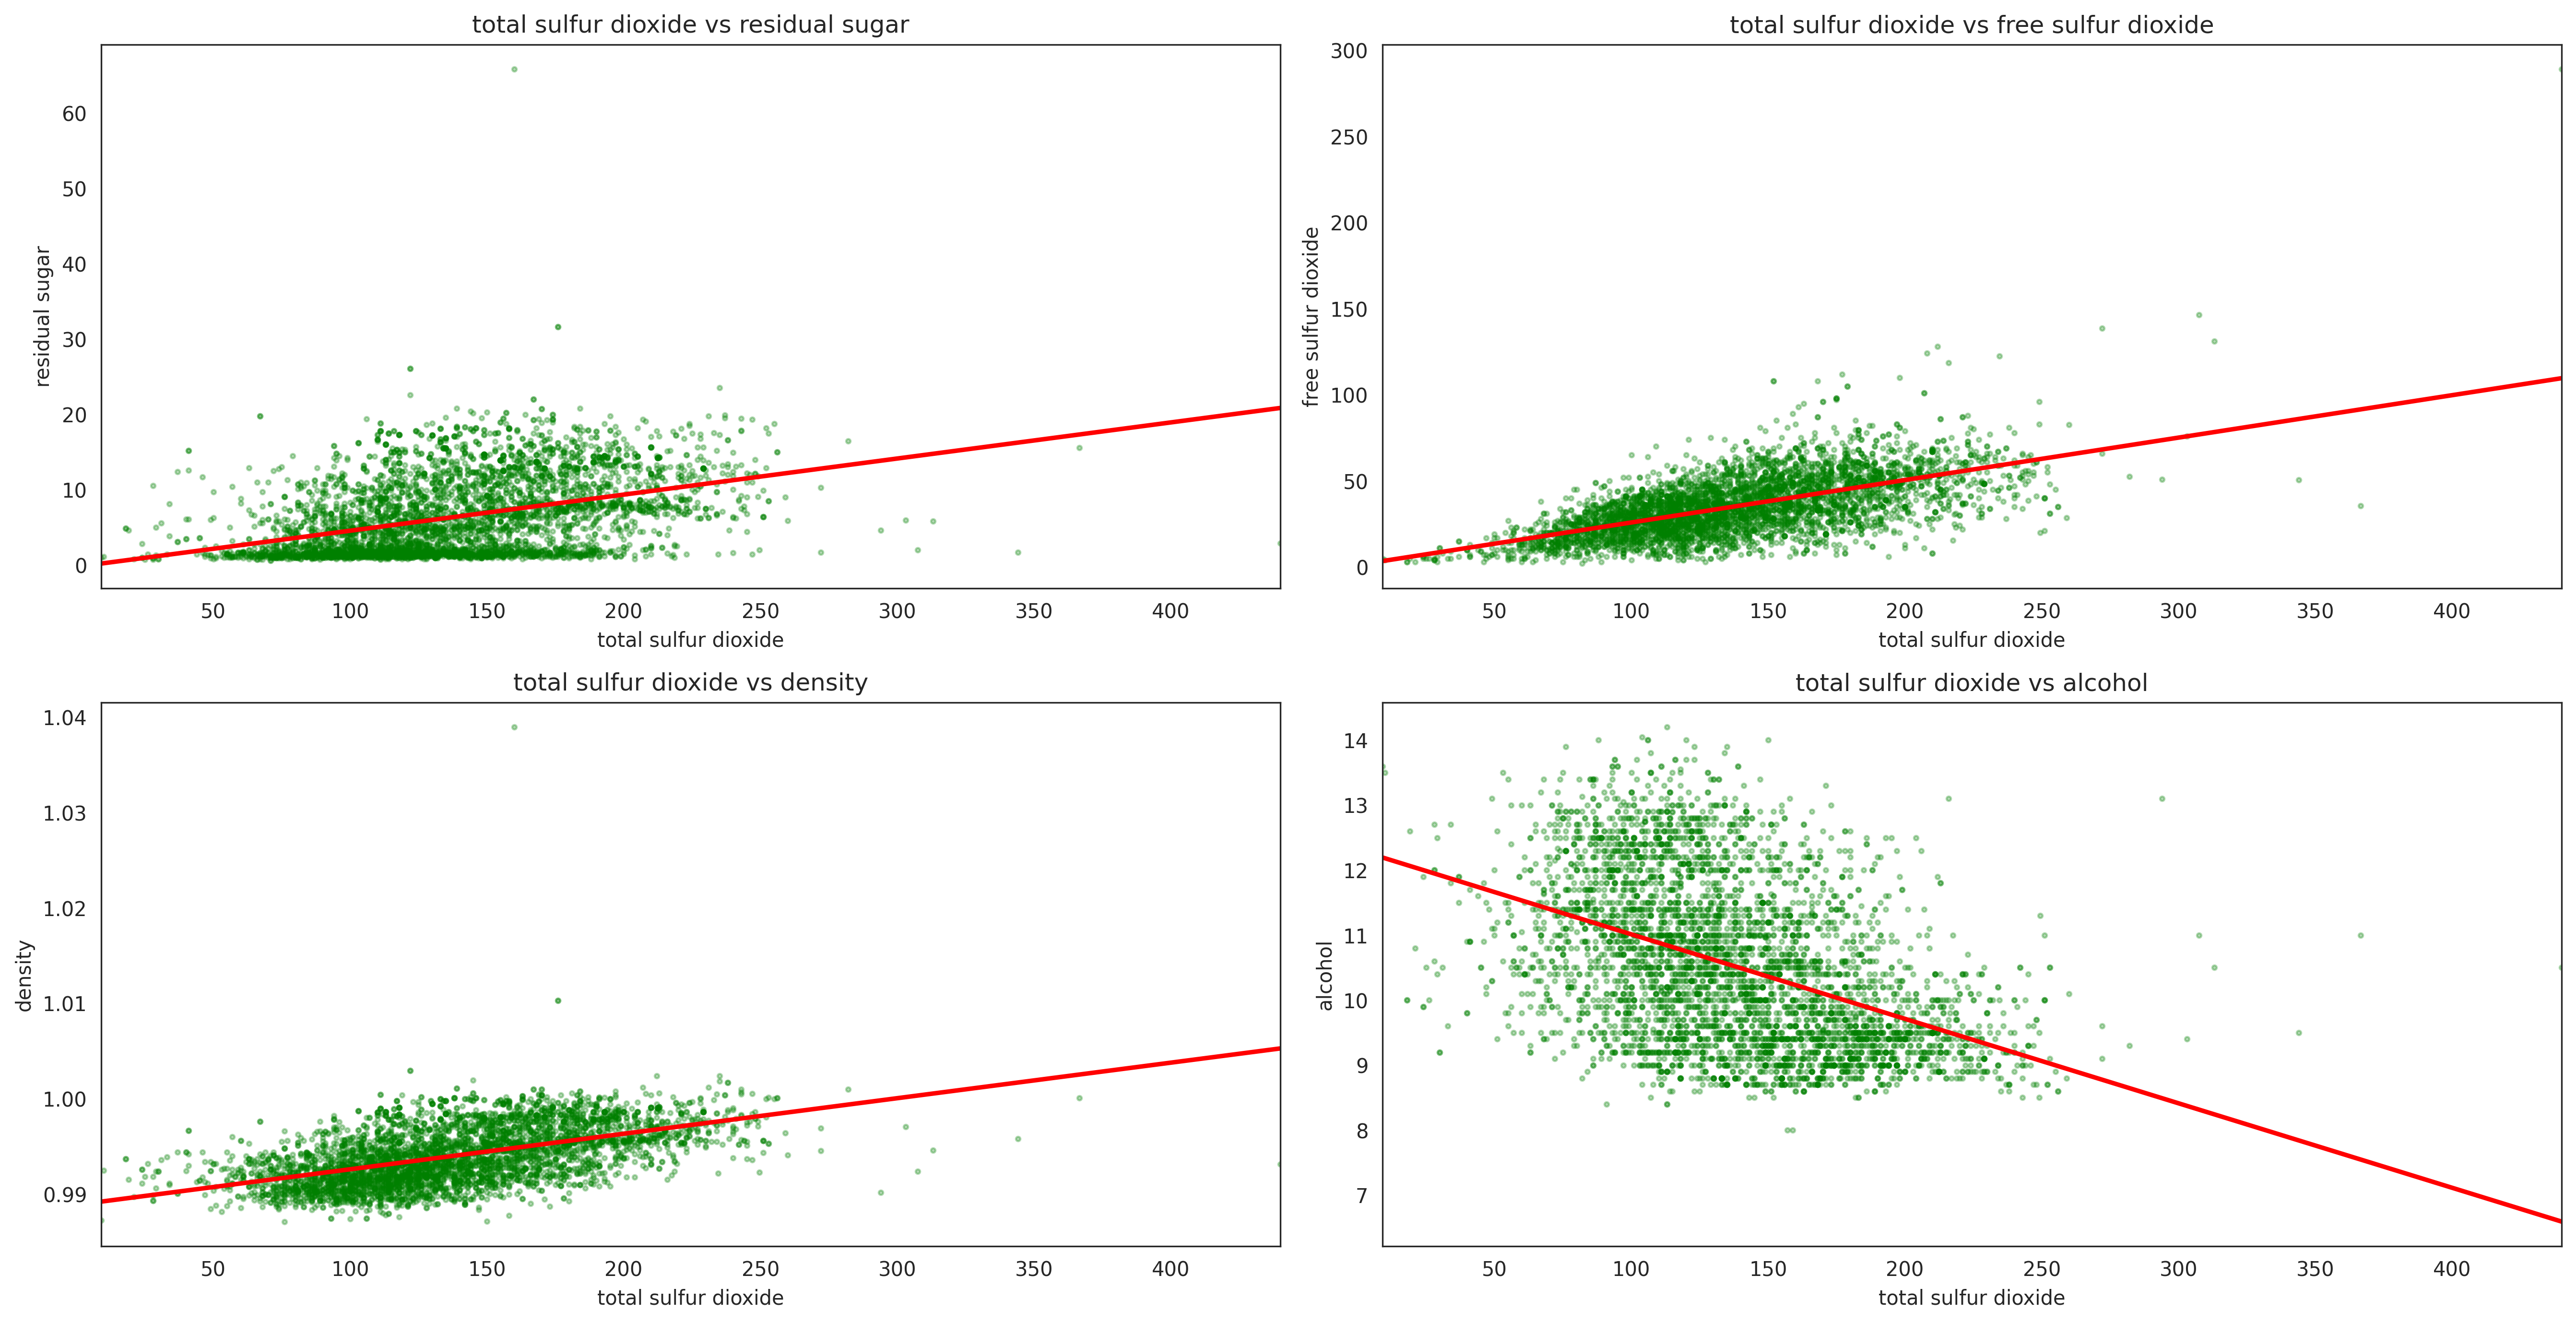

In [ ]:
plt.figure(figsize=(18,18), dpi=300)
feature_list = ["residual sugar", "free sulfur dioxide", "density", "alcohol"]
for i in enumerate(feature_list):
    plt.subplot(4, 2, i[0]+1)
    sns.regplot(x="total sulfur dioxide", y=i[1], data=white_wine,
               ci=None,
               scatter_kws={"alpha":0.3, "s":5, "color":"green"},
               line_kws={"color":"red"})
    plt.title(f"total sulfur dioxide vs {i[1]}")
    plt.tight_layout()

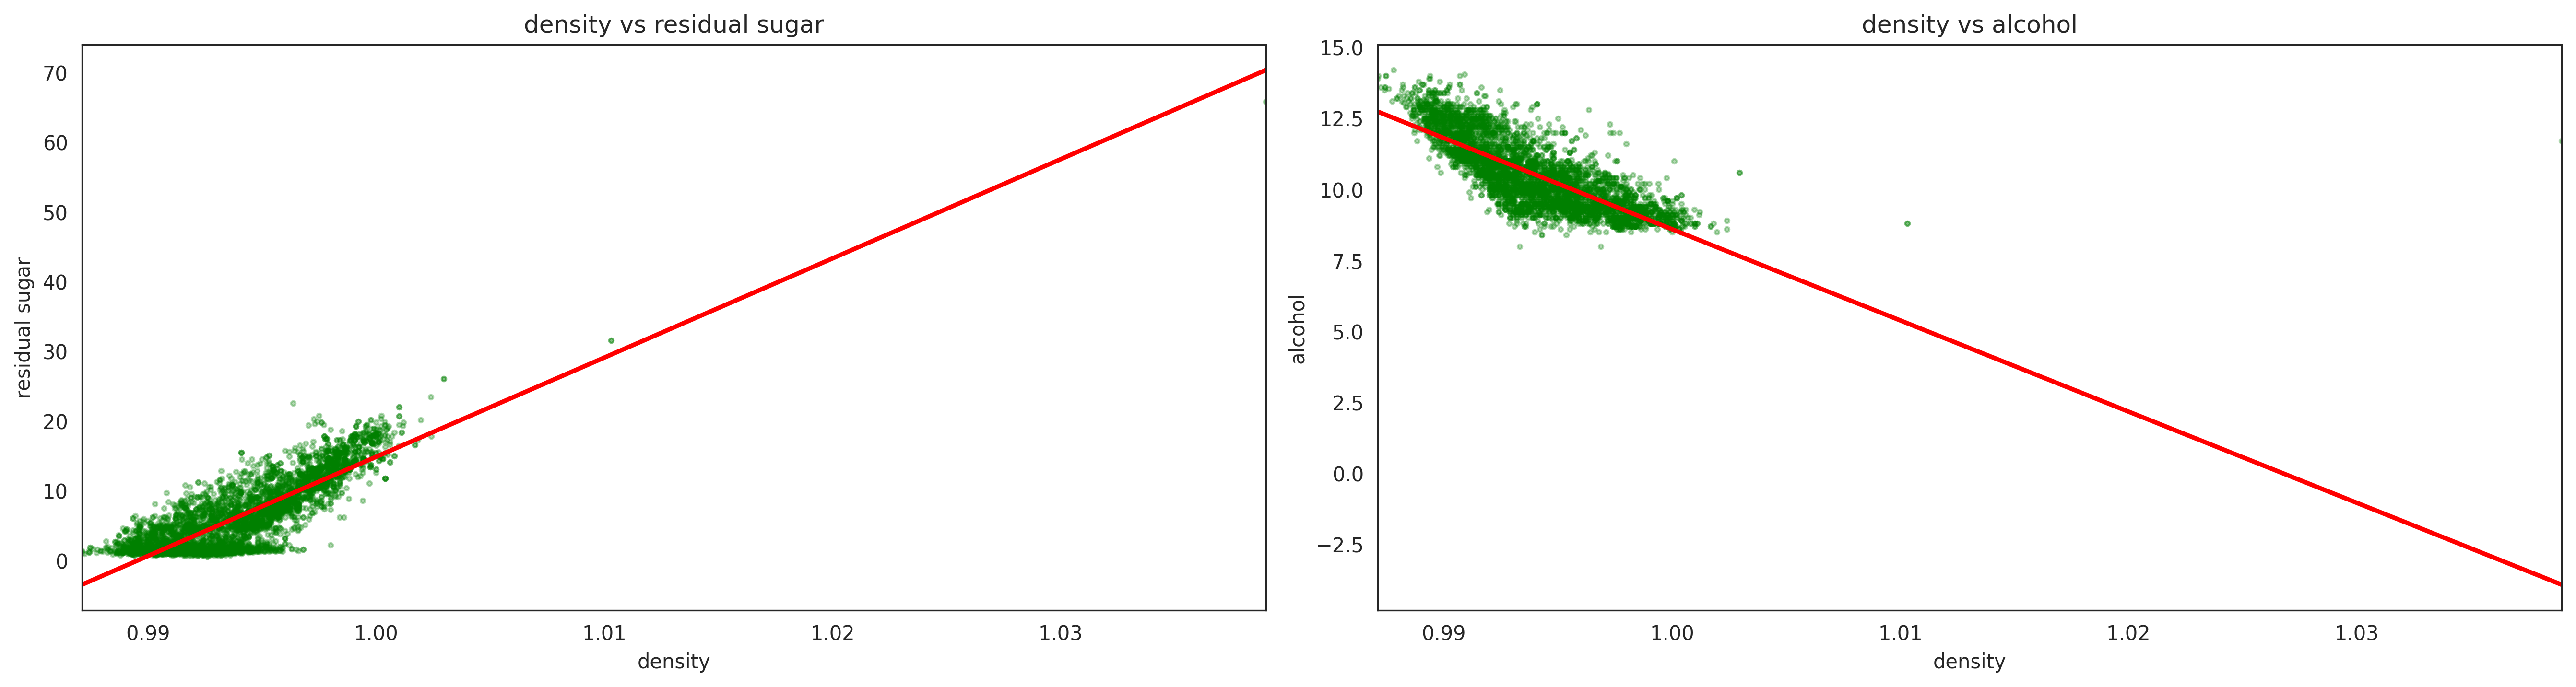

In [ ]:
plt.figure(figsize=(18,18), dpi=300)
feature_list = ["residual sugar", "alcohol"]
for i in enumerate(feature_list):
    plt.subplot(4, 2, i[0]+1)
    sns.regplot(x="density", y=i[1], data=white_wine,
               ci=None,
               scatter_kws={"alpha":0.3, "s":5, "color":"green"},
               line_kws={"color":"red"})
    plt.title(f"density vs {i[1]}")
    plt.tight_layout()

Text(0.5, 1.0, 'Relation between pH and Fixed Acidity')

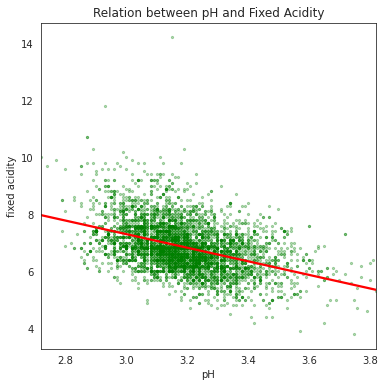

In [ ]:
plt.figure(figsize=(6,6))
g = sns.regplot(x="pH", y="fixed acidity", data=white_wine,
               ci=None,
               scatter_kws={"alpha":0.3, "s":5, "color":"green"},
               line_kws={"color":"red"})
g.set_title("Relation between pH and Fixed Acidity")

Text(0.5, 1.0, 'Relation between alcohol and residual sugar')

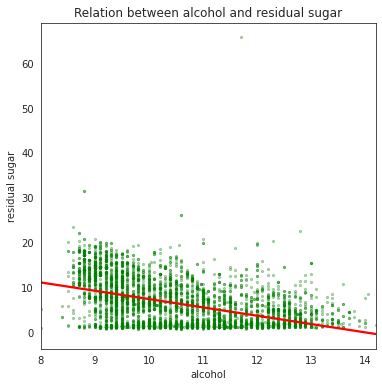

In [ ]:
plt.figure(figsize=(6,6))
g = sns.regplot(x="alcohol", y="residual sugar", data=white_wine,
               ci=None,
               scatter_kws={"alpha":0.3, "s":5, "color":"green"},
               line_kws={"color":"red"})
g.set_title("Relation between alcohol and residual sugar")

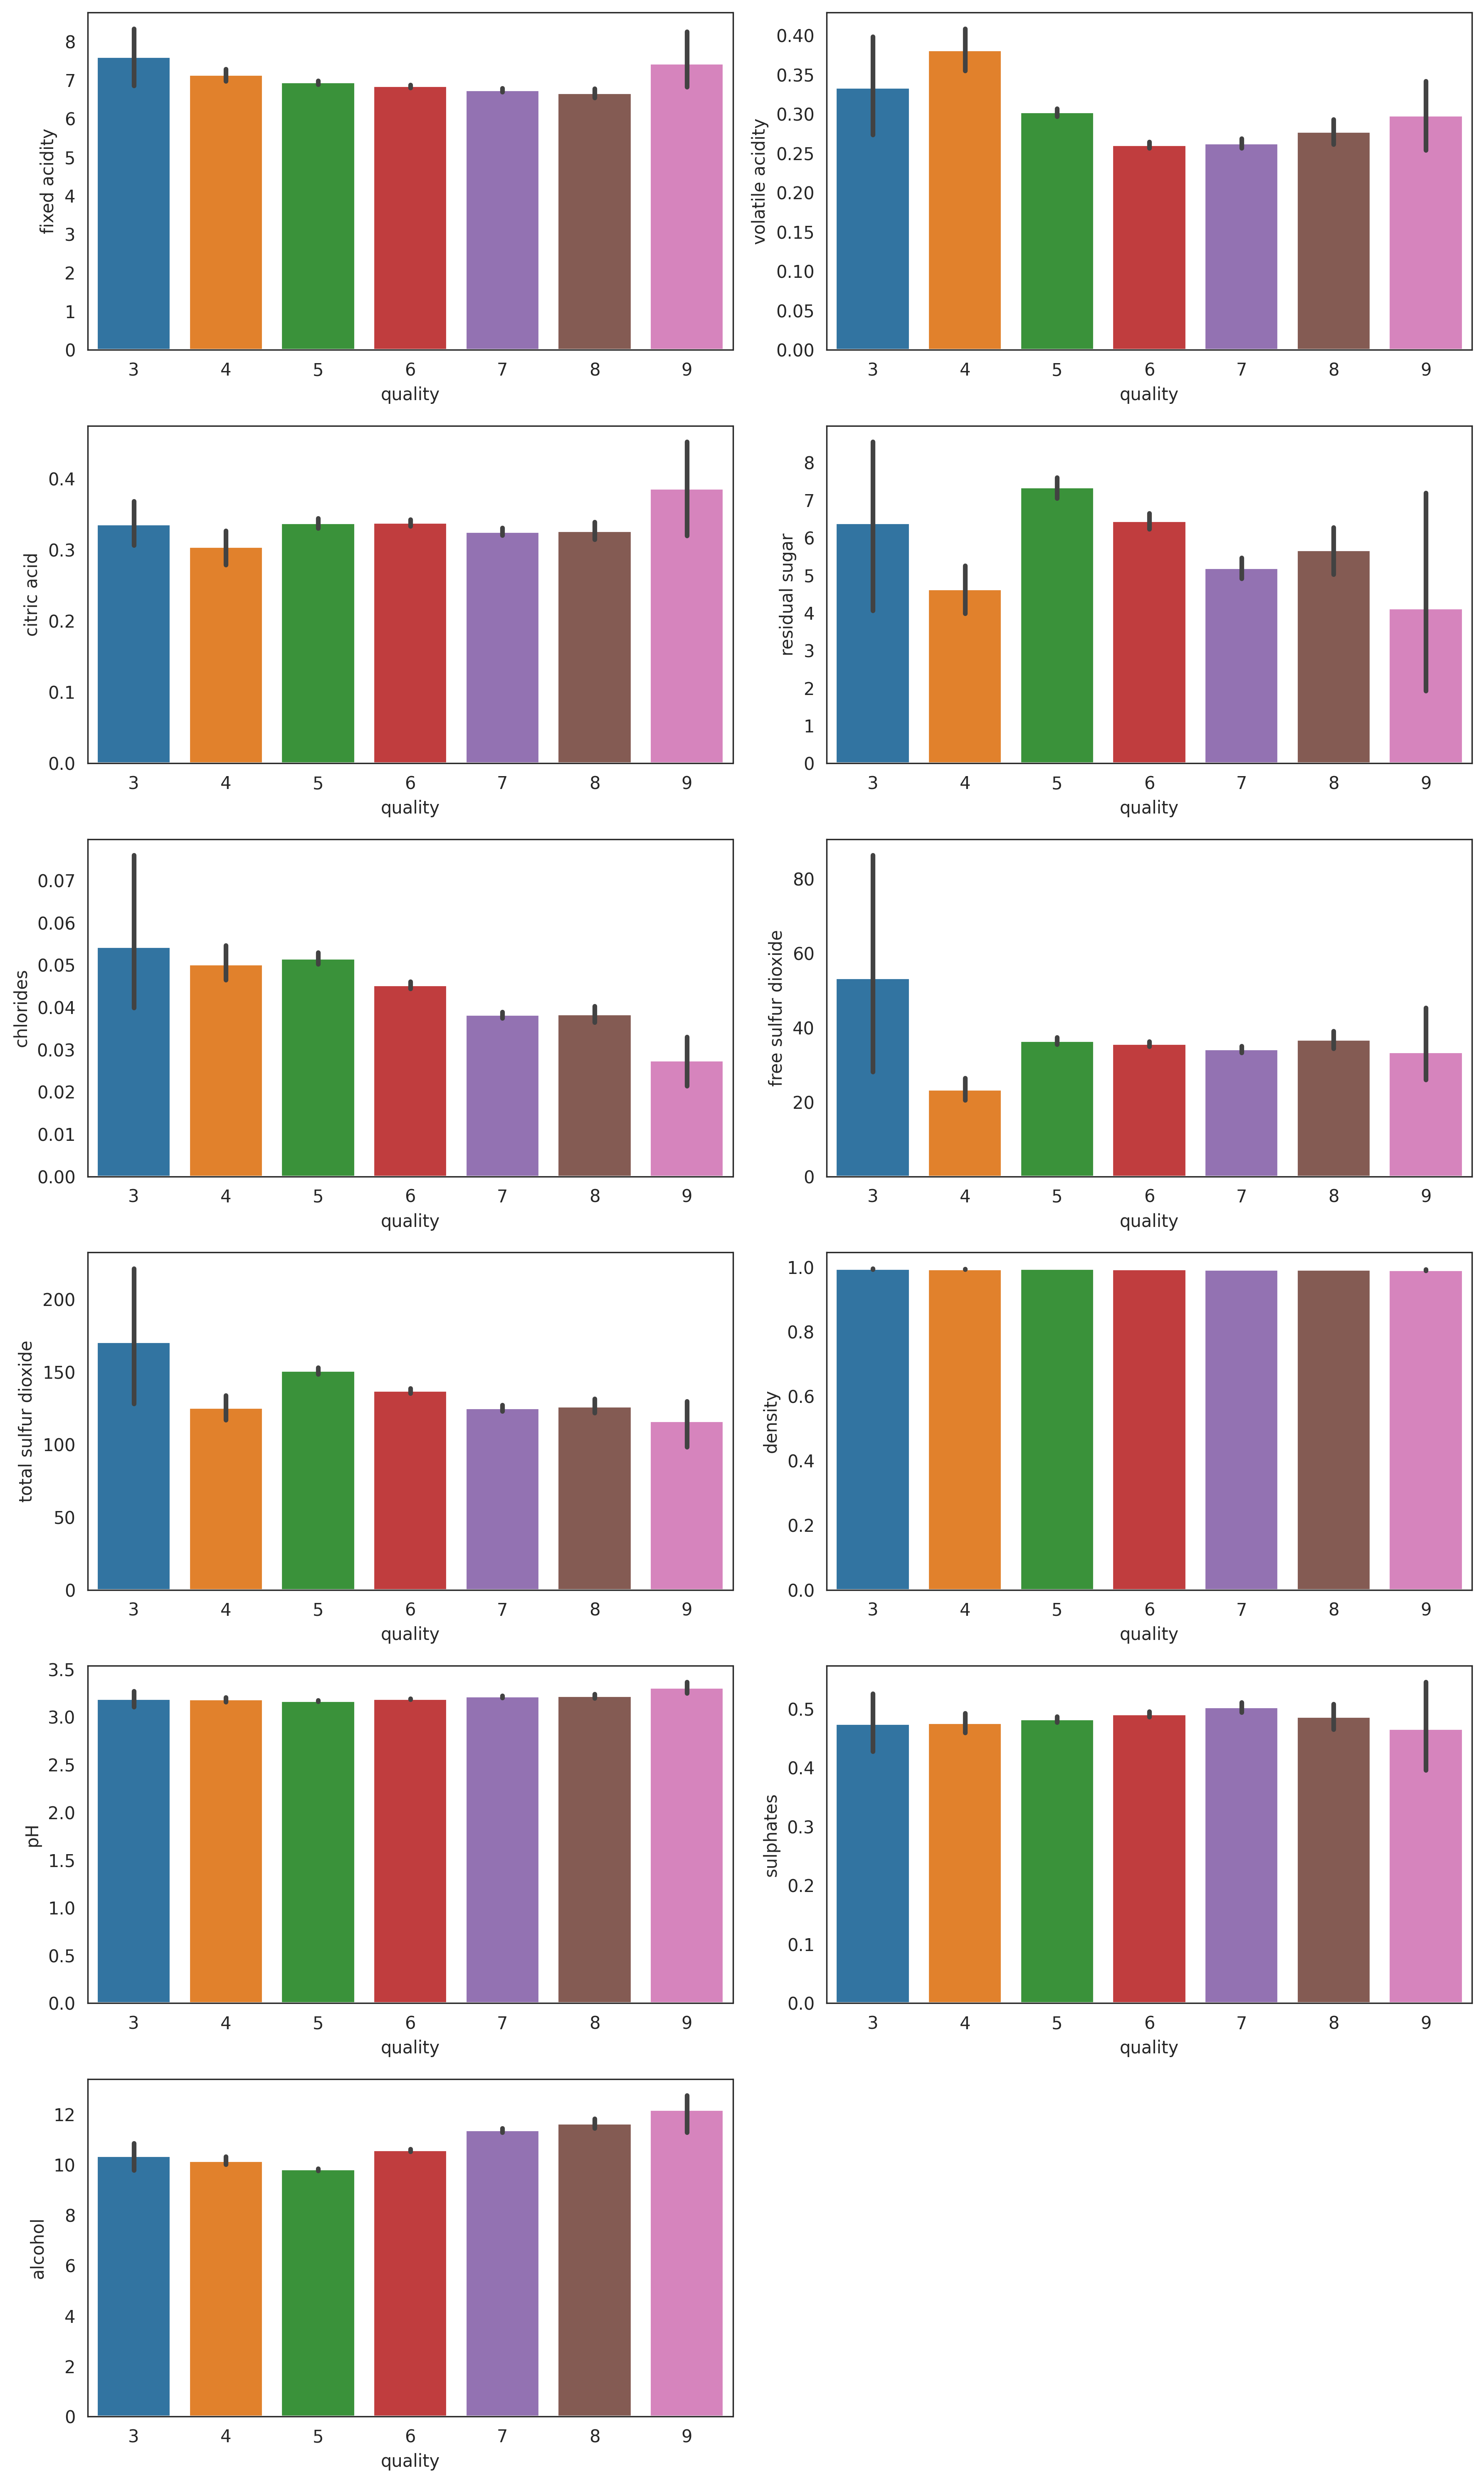

In [ ]:
columns = white_wine.columns.to_list()[:len(white_wine.columns)-1]
plt.figure(figsize=(12,20), dpi=300)
for i in enumerate(columns):
    plt.subplot(6, 2, i[0]+1)
    sns.barplot(x="quality", y=i[1], data=white_wine)
    plt.tight_layout()

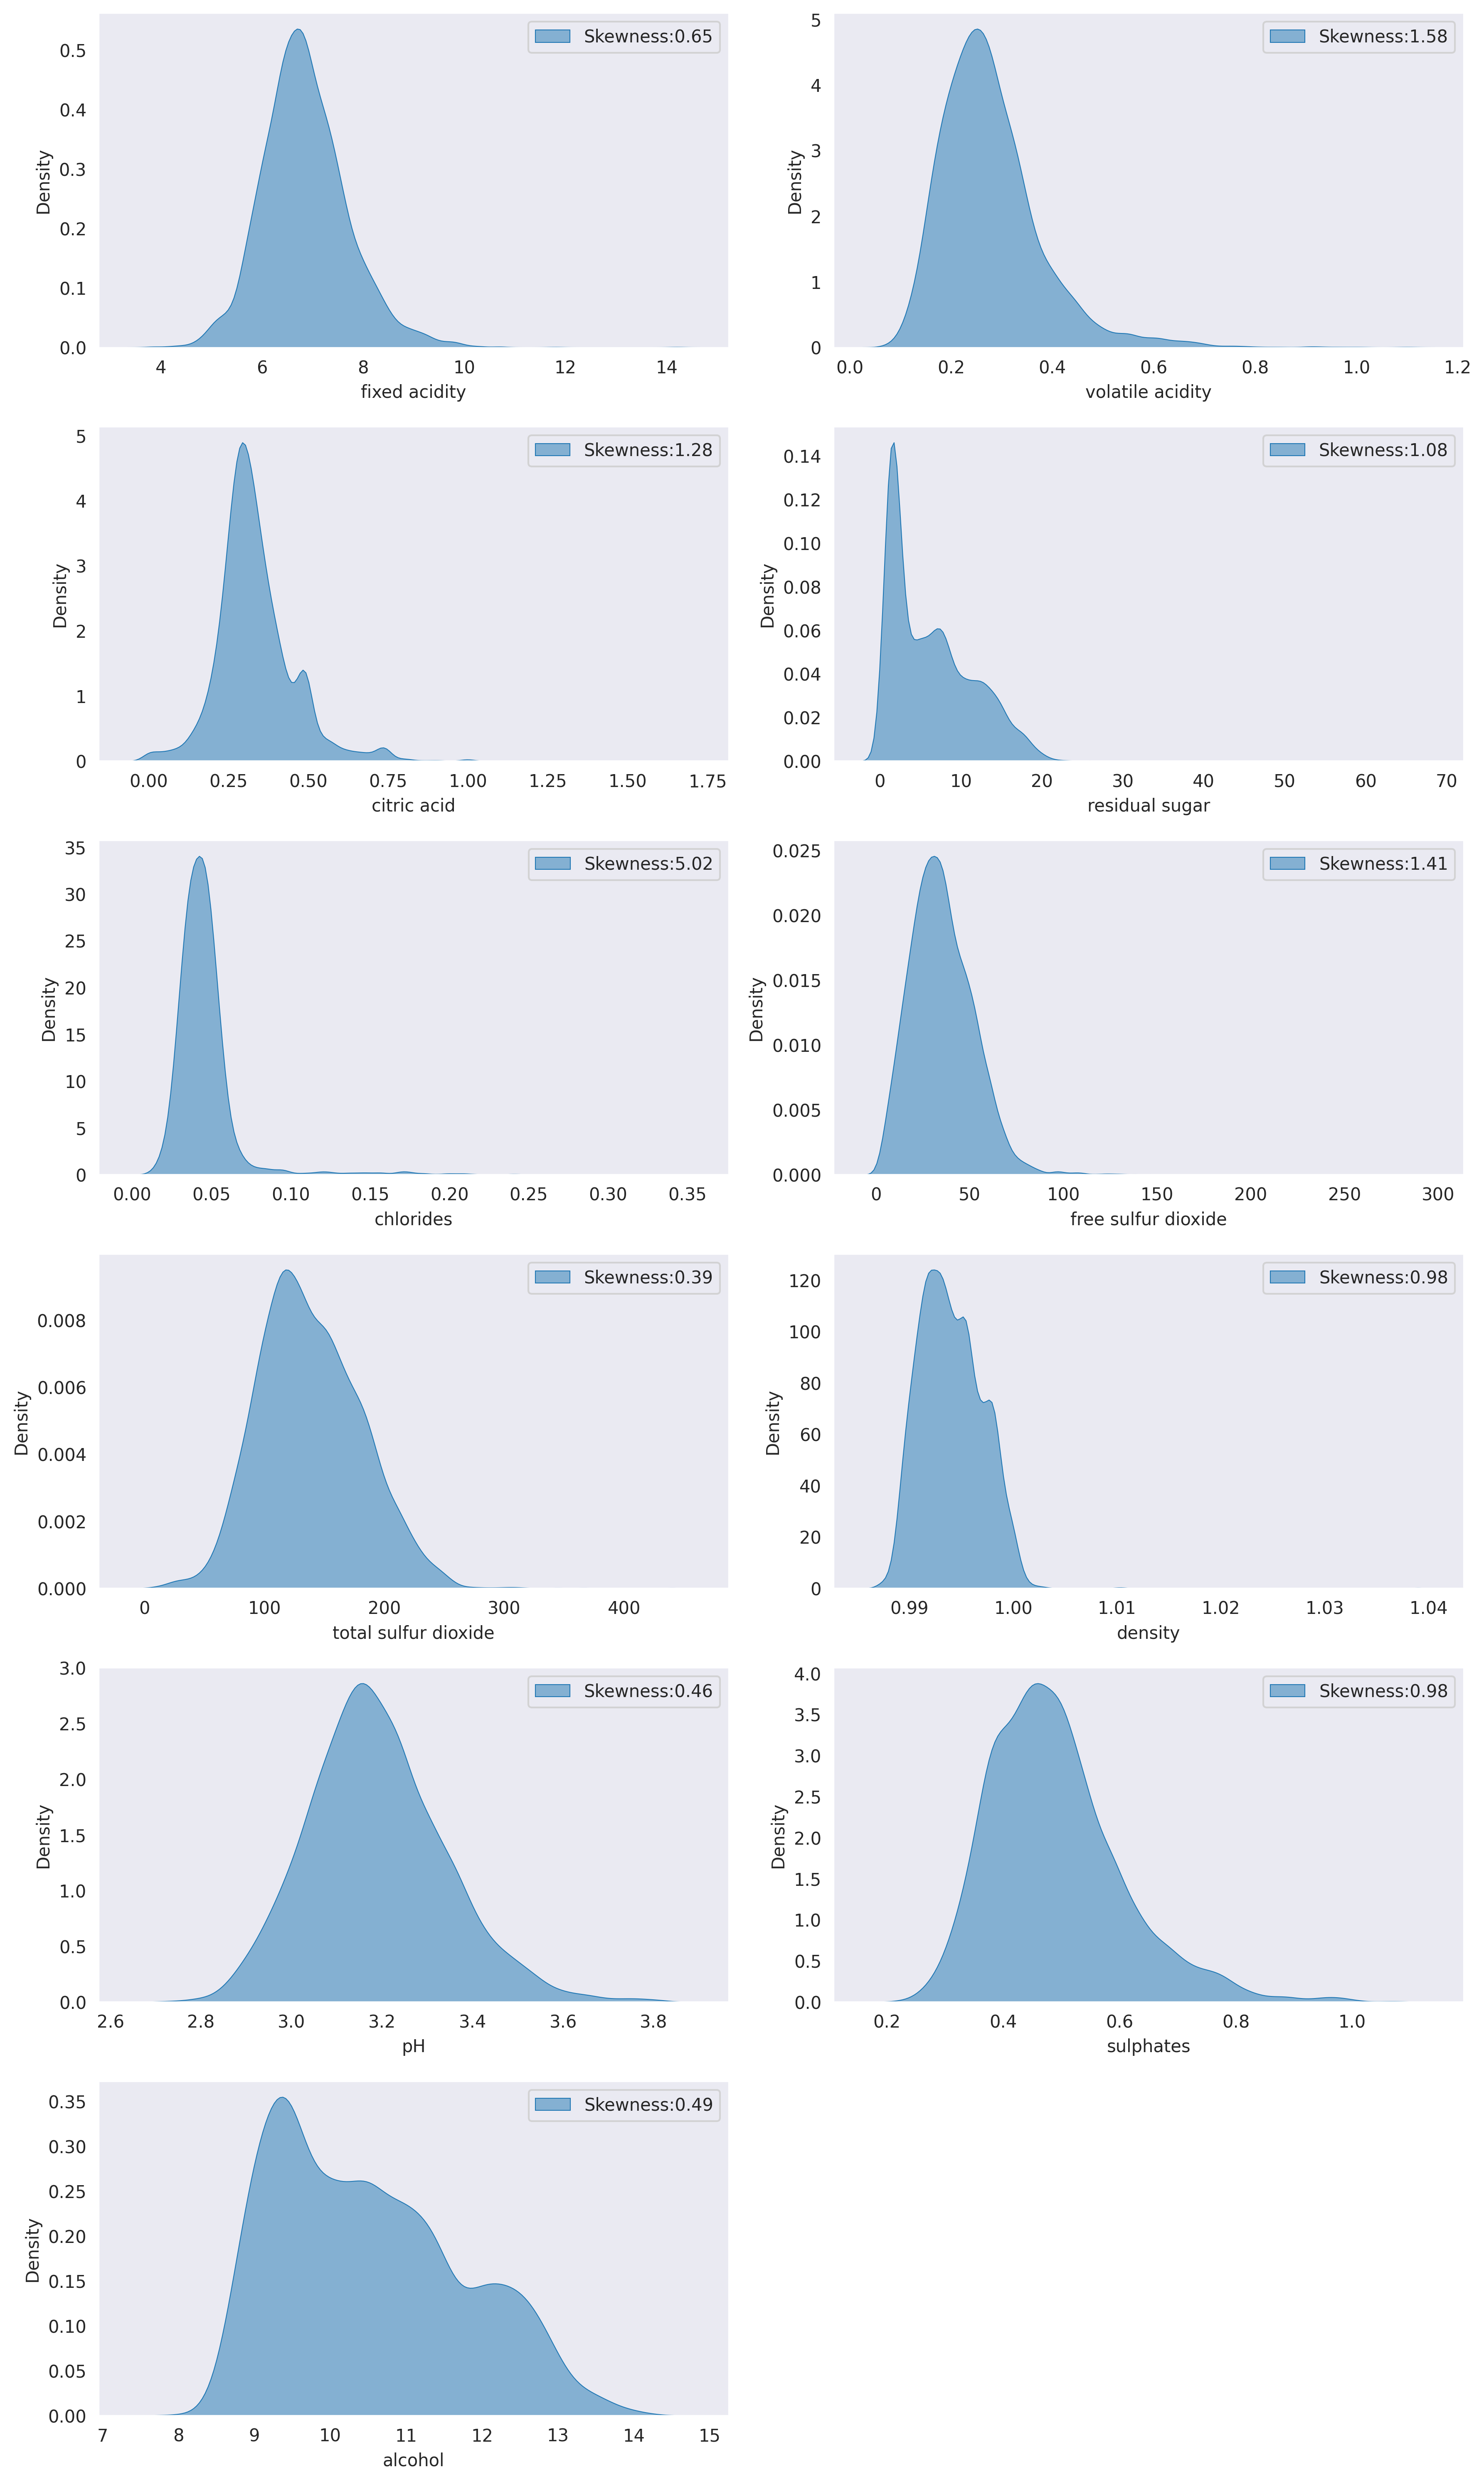

In [ ]:
sns.set_style("dark")
columns = white_wine.columns.to_list()[:len(white_wine.columns)-1]
plt.figure(figsize=(12,20), dpi=300)
for i in enumerate(columns):
    plt.subplot(6, 2, i[0]+1)
    sns.kdeplot(x=i[1], data=white_wine, fill=True,
               alpha=0.5, linewidth=0.5, 
               label=f"Skewness:{round(white_wine[i[1]].skew(),2)}")
    plt.legend()
    plt.tight_layout()

In [ ]:
# Features to PowerTransform are : residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates
# Features to Standardize are : fixed acidity, volatile acidity, citric acid, density, pH, alcohol
features_to_log = ["residual sugar", "volatile acidity","citric acid","chlorides", "free sulfur dioxide"]
features_to_scale = ["fixed acidity","total sulfur dioxide","density", "pH", "alcohol", "sulphates"]

scale_pipeline = Pipeline(steps=[('standardization', StandardScaler())])
log_pipeline = Pipeline(steps=[('normalization', PowerTransformer())])

preprocessor = ColumnTransformer(transformers=[('standardization', scale_pipeline, features_to_scale),
                                             ('normalization', log_pipeline, features_to_log)])
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('standardization',
                                 Pipeline(memory=None,
                                          steps=[('standardization',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 ['fixed acidity', 'total sulfur dioxide',
                                  'density', 'pH', 'alcohol', 'sulphates']),
                                ('normalization',
                                 Pipeline(memory=None,
                                          steps=[('normalization',
                                                  PowerTransformer(copy=True,
         

In [ ]:
X = white_wine.drop("quality", axis=1)
y = white_wine.quality
x_preprocessed = preprocessor.fit_transform(X)
x_df = pd.DataFrame(x_preprocessed, columns=white_wine.columns.to_list()[:len(white_wine.columns)-1])
print("Skewness after feature scaling: ")
print(x_df.skew())

Skewness after feature scaling: 
fixed acidity           0.647751
volatile acidity        0.390710
citric acid             0.977773
residual sugar          0.457783
chlorides               0.487342
free sulfur dioxide     0.977194
total sulfur dioxide    0.001397
density                 0.008625
pH                     -0.074578
sulphates              -0.066480
alcohol                 0.026995
dtype: float64


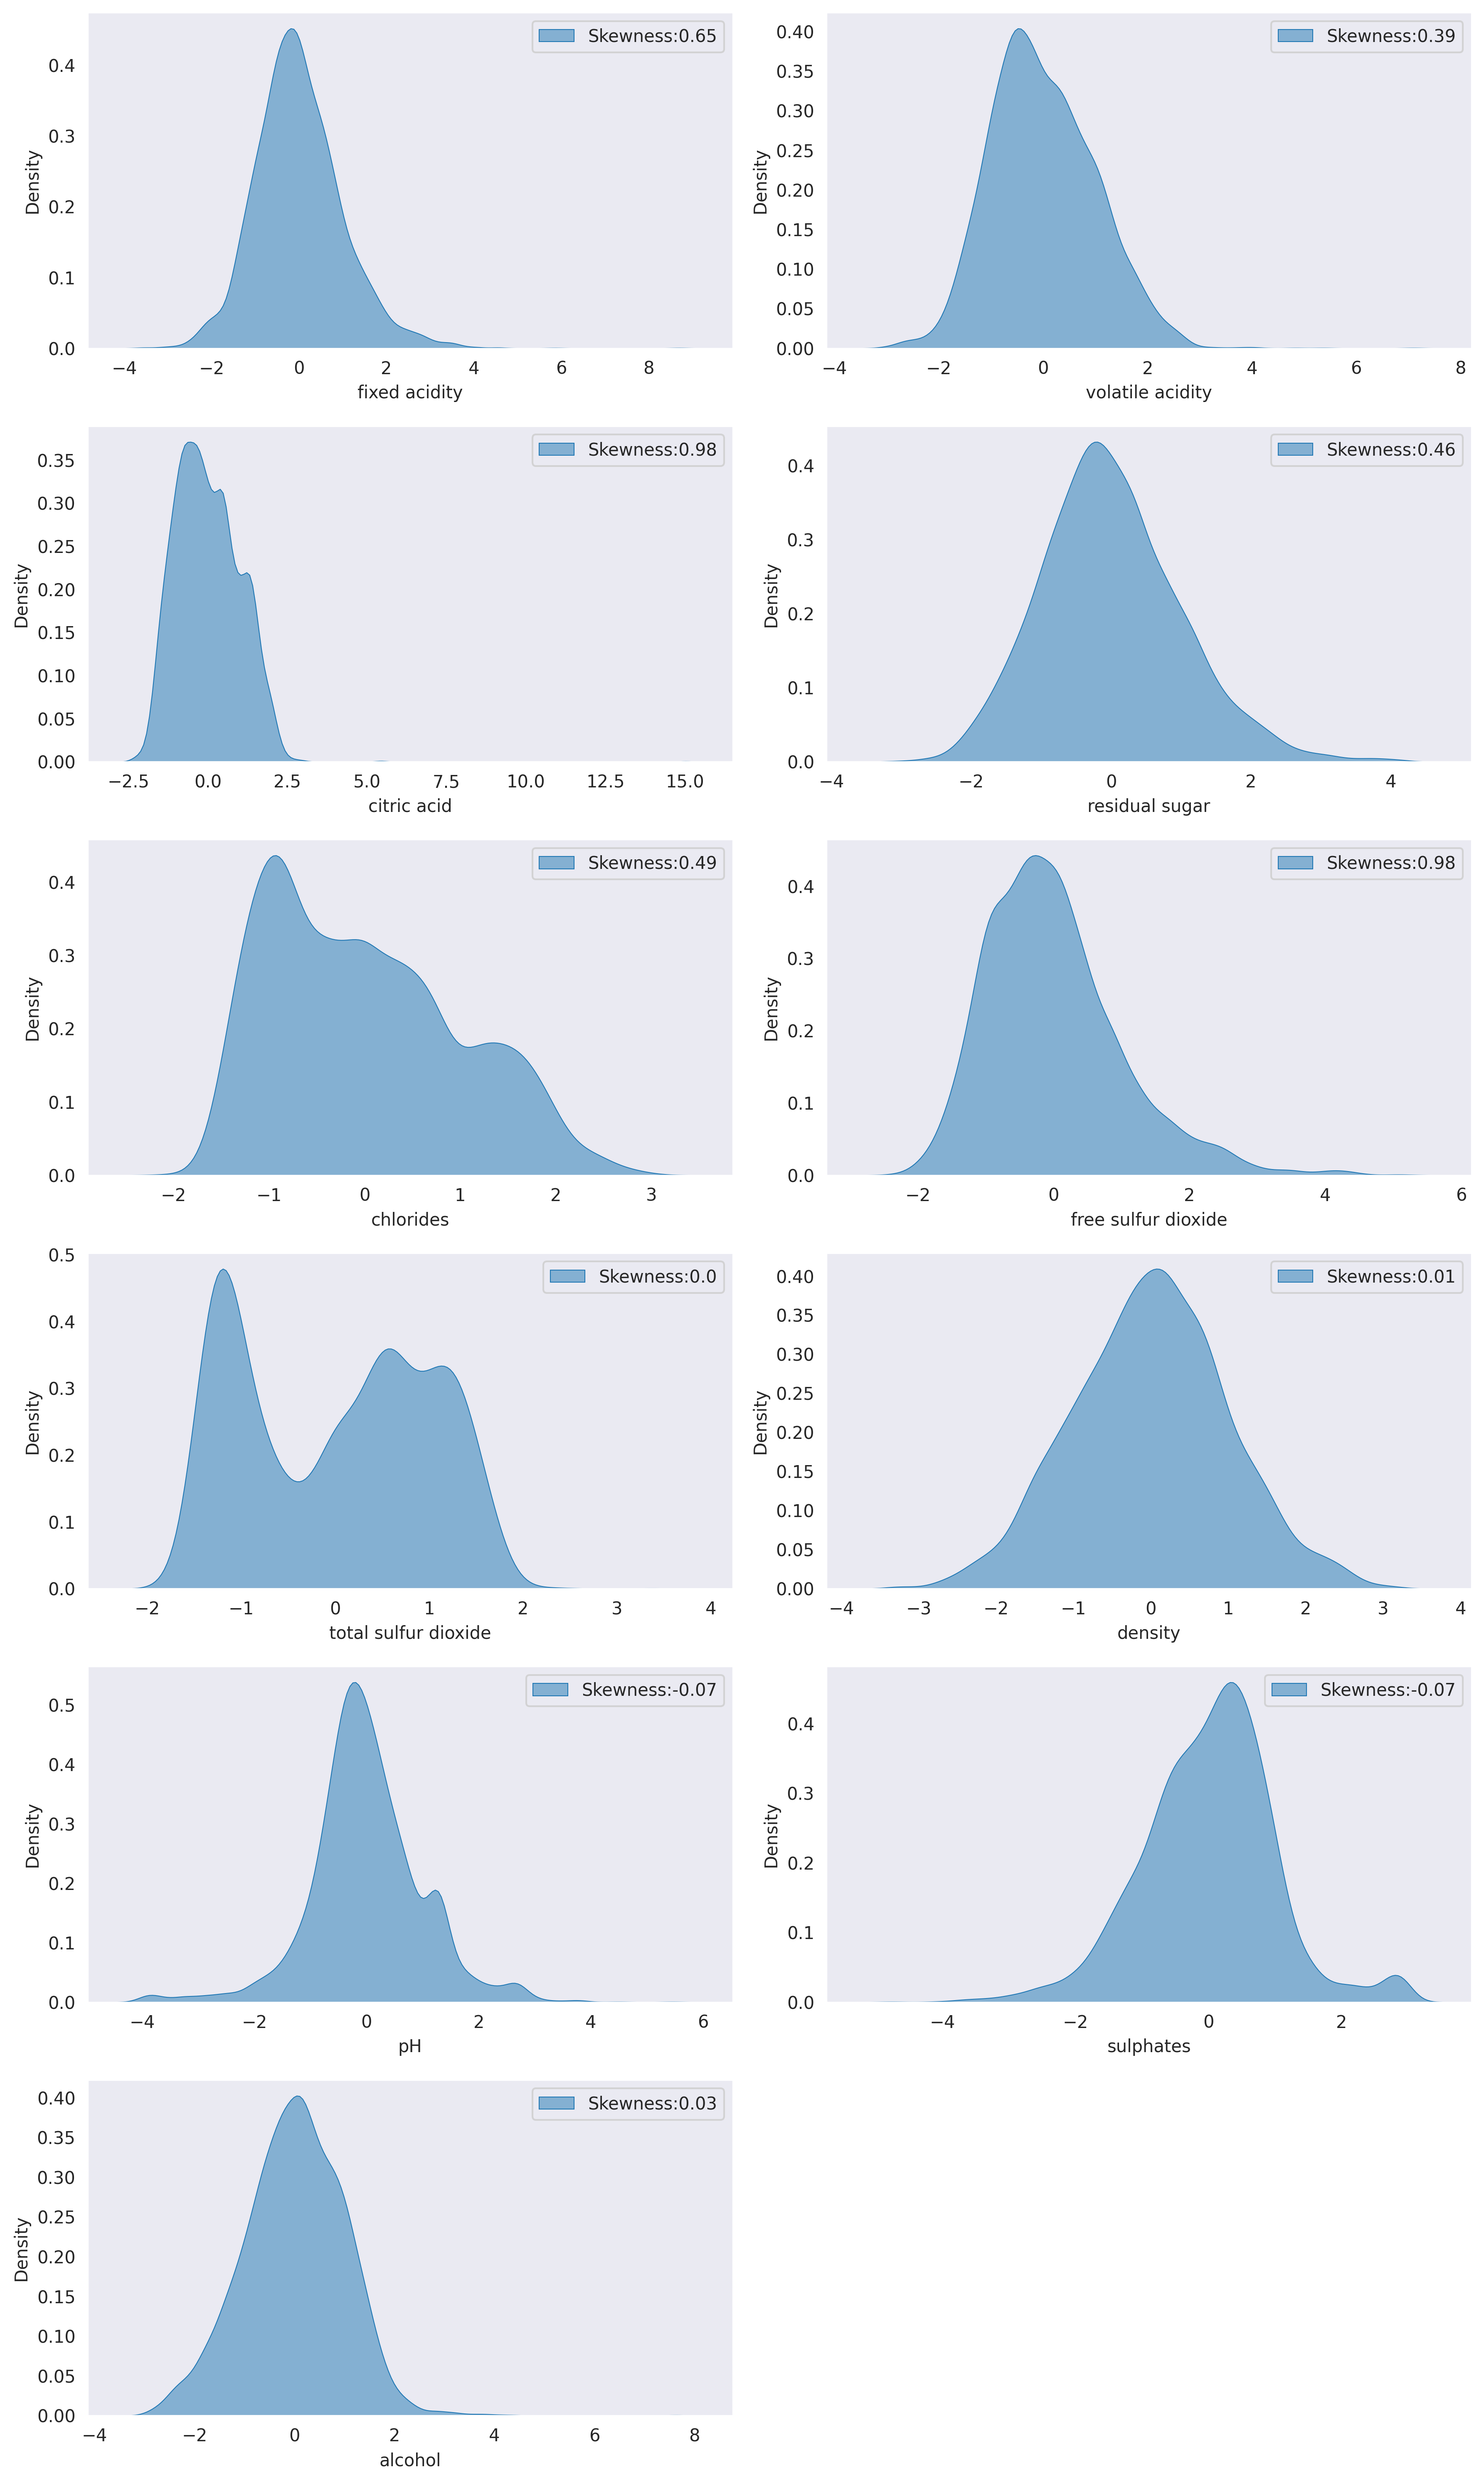

In [ ]:
# Visualizing after Column transformation
sns.set_style("dark")
columns = white_wine.columns.to_list()[:len(white_wine.columns)-1]
plt.figure(figsize=(12,20), dpi=300)
for i in enumerate(columns):
    plt.subplot(6, 2, i[0]+1)
    sns.kdeplot(x=i[1], data=x_df, fill=True,
               alpha=0.5, linewidth=0.5, 
               label=f"Skewness:{round(x_df[i[1]].skew(),2)}")
    plt.legend()
    plt.tight_layout()

In [ ]:
def model_training(X, y):
    models=[
        LogisticRegression(solver="newton-cg"),
        KNeighborsClassifier(n_neighbors=4),
        SVC(),
        GaussianNB(),
    ]
    names=[
        "LogisticRegression",
        "KNeighborsClassifier",
        "SupportVectorClassifier",
        "GaussianNaiveBayes"
    ]
    model_scores = []
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for name, model in zip(names, models):
        cv_score = cross_val_score(model, X, y, cv=skf,
                                  scoring="accuracy")
        model_scores.append(cv_score.mean())
    scores_dataframe = pd.DataFrame(model_scores, index=names, columns=["Score"])
    print(scores_dataframe)

In [ ]:
def tree_model_training(X, y):
    names=[
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "ExtraTreesClassifier",
    ]
    models=[
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()
    ]
    model_scores = []
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for name, model in zip(names, models):
        cv_score = cross_val_score(model, X, y, cv=skf,
                                  scoring="accuracy")
        model_scores.append(cv_score.mean())
    scores_dataframe = pd.DataFrame(model_scores, index=names, columns=["Score"])
    print(scores_dataframe)

In [ ]:
model_training(x_preprocessed, y)
print()
model_training(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

                            Score
LogisticRegression       0.538586
KNeighborsClassifier     0.559806
SupportVectorClassifier  0.569615
GaussianNaiveBayes       0.476521



/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


                            Score
LogisticRegression       0.533071
KNeighborsClassifier     0.483057
SupportVectorClassifier  0.448142
GaussianNaiveBayes       0.447324


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
tree_model_training(x_preprocessed, y)
print()
tree_model_training(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


                           Score
DecisionTreeClassifier  0.630242
RandomForestClassifier  0.696192
ExtraTreesClassifier    0.706811



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


                           Score
DecisionTreeClassifier  0.630858
RandomForestClassifier  0.699661
ExtraTreesClassifier    0.704154


In [ ]:
# Using RandomForestClassifier to calculate feature importance
rfc = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
output = cross_validate(rfc, X, y, cv=skf, scoring="accuracy", return_estimator=True)
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for classifier {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X.columns.to_list(),
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Features sorted by their score for classifier 0:
                      importance
alcohol                 0.119144
density                 0.101945
volatile acidity        0.098830
free sulfur dioxide     0.095702
total sulfur dioxide    0.091454
pH                      0.086262
residual sugar          0.085998
chlorides               0.083741
citric acid             0.081737
sulphates               0.080186
fixed acidity           0.075000
Features sorted by their score for classifier 1:
                      importance
alcohol                 0.113119
density                 0.105576
volatile acidity        0.099532
free sulfur dioxide     0.095057
total sulfur dioxide    0.091211
residual sugar          0.088038
pH                      0.086265
chlorides               0.084699
sulphates               0.080871
citric acid             0.080176
fixed acidity           0.075456
Features sorted by their score for classifier 2:
                      importance
alcohol                 0.11

In [ ]:
# Using top five features for training
X = x_df.loc[:, ["alcohol", "sulphates", "volatile acidity", "total sulfur dioxide", "density"]]
model_training(X,y)
X = white_wine.drop("quality", axis=1)
tree_model_training(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

                            Score
LogisticRegression       0.493878
KNeighborsClassifier     0.517150
SupportVectorClassifier  0.521838
GaussianNaiveBayes       0.483872


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


                           Score
DecisionTreeClassifier  0.622489
RandomForestClassifier  0.700275
ExtraTreesClassifier    0.701297


In [ ]:
rfc = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
output = cross_val_score(rfc, X, y, cv=skf, scoring="accuracy")
output

array([0.68673469, 0.69489796, 0.68163265, 0.69050051, 0.64964249])